# Skillenza-Imarticus-Data-Science-Hackathon-May - 2022
## Project Abstract :
### You are a data scientist of a big MNC who usually hires more than 10k candidates every year. To complete the task they conduct more than 1 lakhs of interviews every year. Interview-Intel is the modern way to approach hiring by harmonizing all aspects of the interview process into a beautiful symphony. An interview intelligence tool records, transcribes, and analyzes candidate conversations. It helps the hiring managers, recruiters, and HR Business Partners (HRBPs) to gain deeper visibility into the interview process, create smooth feedback loops between the panellists, and improve the overall recruitment process.
## Problem Statement:
### You need to predict the status of the interviews so that recruiters can check the sanity of the interview and find if the interview was biased.

## Dataset Information:
### Column Description:
#### Interview Id : Id for the interview
#### Candidate Id : Id for the candidate
#### Interviewer Id : Id for the interviewer
#### Profile : Profile type
#### S.L.R.C (Speak to Listen Ratio Candidate): It is the ratio of speaking time to the listening time of the Candidate.
#### S.L.R.I (Speak to Listen Ratio Interviewer): It is the ratio of speaking time to the listening time of the Interviewer.
#### A.T.T Avg Turn Time (Interactivity Time): It is the average amount of time in which single interaction happens between the Interviewer and the Candidate.
#### L.M.I (Longest Monologue Interviewer): It is the longest amount of time that the interviewer spoke continuously.
#### L.M.C (Longest Monologue Candidate): It is the longest amount of time that the candidate spoke continuously.
#### S.R (SILENCE RATIO):It is the percentage of time when no one had spoken
#### L.J.T.C (Late Joining Time Candidate): It is the amount of time a candidate joined late for the interview call.
#### L.J.T.I (Late Joining Time Interviewer): It is the amount of time the interviewer joined late for the interview call.
#### N.I.C(Noise Index Candidate): Percentage of Background Noise present on the candidate side.
#### N.I.I(Noise Index Interviewer): Percentage of Background Noise present on the interviewer’s side.
#### S.P.I - Speaking Pace interviewer: Average Number of words spoken per minute.
#### S.P.C - Speaking Pace Candidate: Average Number of words spoken per minute.
#### L.A.I - Live Absence interviewer: It is the percentage of time the interviewer was not present in the video call.
#### L.A.C - Live Absence candidate: It is the percentage of time the candidate was not present in the video call.
#### Q.A - Question asked during the interview
#### P.E.I - Perceived Emotion Interviewer: It is the perceived emotion of Interviewer which can be either Positive or Negative
#### P.E.C - Perceived Emotion Candidate: It is the perceived emotion of candidate which can be either Positive or Negative
#### Compliance ratio - Does the interviewer follow the structure that has been guided by the company. It is the ratio of questions assigned to the number of questions which were actually asked.
#### Interview Duration : For how much time interview happened
#### Interview Intro :Does interviewer give the self-introduction to the candidate or not
#### Candidate Intro :Does candidate give the self-introduction to the interviewer or not
#### Opp to ask : Does the interviewer give a chance to the candidate to ask questions at the end.
#### Status : Status of the candidate.

### 1. Importing Necessary Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics
%matplotlib inline

### 2. Importing the necessary Datasets:

In [2]:
# Importing training data
trdf=pd.read_csv('train_IA_-_train.csv')
# Importing testing data
tedf=pd.read_csv('test_IA_-_test.csv')
# Importing Sample data
sdf=pd.read_csv('sample_IA_-_sample.csv')

In [3]:
# Checking training dataset
trdf

,Interview Id,Candidate Id,Interviewer Id,Profile,S.L.R.C,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,...,L.A.I,Q.A,P.E.I,P.E.C,COMPLIANCE Ratio,Interview duration,Interviewer Intro,Candidate into,Opp to ask,Status
0,6.913030e+11,2.655774e+09,194,Developer,0.98,0.02,53,88,93,32,...,15,6,Neutral,Neutral,98,37,No,Yes,Yes,Consider
1,9.214326e+11,7.123846e+08,234,Sales,0.67,0.33,51,53,44,36,...,15,4,Neutral,Negative,54,33,No,No,Yes,Consider
2,4.718839e+10,8.445533e+08,267,Program Manager,0.81,0.19,60,77,75,54,...,7,3,Positive,Positive,31,58,No,Yes,No,Consider
3,9.943741e+11,6.511106e+09,199,Marketing,0.69,0.31,93,42,103,49,...,10,7,Positive,Negative,24,35,No,Yes,No,Consider
4,3.509007e+11,3.487001e+09,221,QA Automation,0.57,0.43,44,44,119,66,...,7,3,Negative,Positive,73,60,Yes,Yes,No,Consider
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5795,3.186849e+11,7.483571e+09,192,Marketing,0.58,0.42,52,51,119,42,...,13,5,Negative,Neutral,16,25,Yes,Yes,No,NaN
5796,2.129354e+11,6.833534e+09,230,QA Manual,0.69,0.31,34,81,115,51,...,3,6,Positive,Negative,23,40,Yes,Yes,No,Consider
5797,8.850640e+11,4.657574e+09,253,Product Manager,0.64,0.36,58,58,43,42,...,19,3,Negative,Neutral,60,18,No,Yes,No,May Consider
5798,6.047461e+11,8.118565e+08,257,Sales,0.94,0.06,104,55,114,68,...,14,3,Neutral,Positive,61,43,Yes,Yes,Yes,Consider


In [4]:
# Checking the Shape of Training Data
trdf.shape 

(5800, 27)

In [5]:
# Checking testing dataset
tedf

,Interview Id,Candidate Id,Interviewer Id,Profile,S.L.R.C,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,...,L.A.C,L.A.I,Q.A,P.E.I,P.E.C,COMPLIANCE Ratio,Interview duration,Interviewer Intro,Candidate into,Opp to ask
0,702127796635,2.381365e+09,229,Product Manager,0.52,0.48,103,53,77,30,...,5,19.0,4.0,Positive,Negative,24.0,49,Yes,Yes,Yes
1,613490569071,8.428514e+08,194,Product Manager,0.87,0.13,54,57,57,68,...,1,9.0,7.0,Positive,Neutral,99.0,24,No,Yes,Yes
2,759998772623,7.681665e+09,266,QA Automation,0.60,0.40,50,117,93,36,...,7,15.0,3.0,Negative,Positive,16.0,16,Yes,No,Yes
3,391760082113,6.627808e+09,256,HR,0.52,0.48,102,114,66,31,...,10,4.0,6.0,Negative,Neutral,66.0,40,No,No,Yes
4,941599210196,1.148634e+09,267,HR,0.59,0.41,96,73,115,23,...,10,4.0,6.0,Positive,Positive,47.0,38,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,256033687434,1.299110e+09,193,Marketing,0.66,0.34,95,118,79,65,...,15,20.0,7.0,Positive,Negative,86.0,49,Yes,Yes,No
1196,627337316047,2.367087e+09,233,Data Scientist,0.66,0.34,42,47,107,57,...,8,18.0,2.0,Positive,Negative,32.0,32,No,Yes,No
1197,75547031851,4.401842e+09,214,HR,0.73,0.27,72,105,78,55,...,1,18.0,3.0,Negative,Negative,34.0,19,Yes,Yes,No
1198,173914777164,7.505289e+08,231,Developer,0.95,0.05,42,45,68,60,...,1,9.0,7.0,Positive,Negative,78.0,23,No,No,No


In [6]:
# Checking the Shape of Testing Data
tedf.shape 

(1200, 26)

In [7]:
# Checking the format of sample dataset
sdf

,Interview Id,Status
0,702127796635,Consider
1,613490569071,Consider
2,759998772623,Consider
3,391760082113,Consider
4,941599210196,Consider
...,...,...
1195,256033687434,Not Consider
1196,627337316047,Not Consider
1197,75547031851,Not Consider
1198,173914777164,Not Consider


# The format of sample dataset is understood

In [8]:
# Creating a new dataset of target Variable and name
df_tar = pd.DataFrame()
df_tar['Interview Id'] = trdf['Interview Id']
df_tar['Status'] = trdf['Status']
df_tar.sample()

,Interview Id,Status
2775,9.162658e+11,Consider


In [9]:
for i in df_tar.columns:
    print(i,'=',df_tar[i].isnull().sum(),df_tar[i].dtype)

Interview Id = 0 float64
Status = 4 object


## We must remember to treat these 4 missing values in object.

### 3. EDA:

In [10]:
# Dropping Status from trdf
trdf.drop('Status',axis=1, inplace=True)

In [11]:
# Concatinating Training and Testing Datasets
df = pd.concat([trdf, tedf])

In [12]:
df.index.is_unique

False

In [13]:
df.index.duplicated()

array([False, False, False, ...,  True,  True,  True])

In [14]:
df.reset_index(drop=True)

,Interview Id,Candidate Id,Interviewer Id,Profile,S.L.R.C,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,...,L.A.C,L.A.I,Q.A,P.E.I,P.E.C,COMPLIANCE Ratio,Interview duration,Interviewer Intro,Candidate into,Opp to ask
0,6.913030e+11,2.655774e+09,194,Developer,0.98,0.02,53,88,93,32,...,13,15.0,6.0,Neutral,Neutral,98.0,37,No,Yes,Yes
1,9.214326e+11,7.123846e+08,234,Sales,0.67,0.33,51,53,44,36,...,5,15.0,4.0,Neutral,Negative,54.0,33,No,No,Yes
2,4.718839e+10,8.445533e+08,267,Program Manager,0.81,0.19,60,77,75,54,...,4,7.0,3.0,Positive,Positive,31.0,58,No,Yes,No
3,9.943741e+11,6.511106e+09,199,Marketing,0.69,0.31,93,42,103,49,...,10,10.0,7.0,Positive,Negative,24.0,35,No,Yes,No
4,3.509007e+11,3.487001e+09,221,QA Automation,0.57,0.43,44,44,119,66,...,13,7.0,3.0,Negative,Positive,73.0,60,Yes,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,2.560337e+11,1.299110e+09,193,Marketing,0.66,0.34,95,118,79,65,...,15,20.0,7.0,Positive,Negative,86.0,49,Yes,Yes,No
6996,6.273373e+11,2.367087e+09,233,Data Scientist,0.66,0.34,42,47,107,57,...,8,18.0,2.0,Positive,Negative,32.0,32,No,Yes,No
6997,7.554703e+10,4.401842e+09,214,HR,0.73,0.27,72,105,78,55,...,1,18.0,3.0,Negative,Negative,34.0,19,Yes,Yes,No
6998,1.739148e+11,7.505289e+08,231,Developer,0.95,0.05,42,45,68,60,...,1,9.0,7.0,Positive,Negative,78.0,23,No,No,No


In [15]:
df.sample(10)

,Interview Id,Candidate Id,Interviewer Id,Profile,S.L.R.C,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,...,L.A.C,L.A.I,Q.A,P.E.I,P.E.C,COMPLIANCE Ratio,Interview duration,Interviewer Intro,Candidate into,Opp to ask
1223,1.867856e+11,9.478605e+09,241,Program Manager,0.51,0.49,58,114,108,69,...,15,11.0,4.0,Negative,Positive,93.0,17,No,Yes,No
5156,1.122650e+11,3.741981e+08,229,HR,0.63,0.37,113,119,61,56,...,14,12.0,5.0,Neutral,Negative,28.0,27,Yes,No,No
188,9.332630e+11,5.176972e+09,208,Developer,0.95,0.05,119,88,81,56,...,14,3.0,6.0,Negative,Neutral,32.0,32,No,Yes,Yes
885,8.128848e+11,3.764826e+09,251,Marketing,0.61,0.39,67,59,116,68,...,2,17.0,7.0,Negative,Negative,45.0,20,Yes,Yes,Yes
974,1.736632e+11,5.973668e+09,244,Data Scientist,0.64,0.36,22,101,90,33,...,14,15.0,7.0,Negative,Neutral,77.0,19,Yes,No,Yes
4007,9.919213e+11,7.242587e+09,227,Data Scientist,0.73,0.27,66,88,62,32,...,7,17.0,2.0,Positive,Neutral,37.0,48,Yes,No,No
1336,7.633770e+11,1.051126e+09,223,Developer,0.72,0.28,86,71,71,44,...,7,7.0,5.0,Neutral,Neutral,88.0,41,Yes,Yes,Yes
1227,5.135753e+11,6.345880e+09,220,Product Manager,0.92,0.08,75,52,103,65,...,3,15.0,2.0,Negative,Neutral,8.0,46,No,No,No
186,7.736816e+11,2.660009e+09,262,QA Manual,0.61,0.39,57,108,42,40,...,10,2.0,5.0,Neutral,Negative,72.0,38,Yes,No,No
335,4.886703e+10,2.593790e+09,258,HR,0.53,0.47,33,83,96,70,...,5,10.0,2.0,Neutral,Neutral,48.0,27,No,No,Yes


In [16]:
df.describe()

,Interview Id,Candidate Id,Interviewer Id,S.L.R.C,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,L.J.T.C,L.J.T.I,N.I.C,N.I.I,S.P.I,S.P.C,L.A.C,L.A.I,Q.A,COMPLIANCE Ratio,Interview duration
count,7.000000e+03,7.000000e+03,7000.000000,7000.000000,6999.000000,7000.000000,7000.000000,7000.000000,7000.000000,6999.000000,7000.000000,7000.000000,7000.000000,6998.000000,7000.000000,7000.000000,6999.000000,6999.000000,6999.000000,7000.000000
mean,4.947849e+11,4.991220e+09,229.472857,0.746509,0.253511,69.973857,80.273286,80.306286,45.066429,150.518646,301.705286,37.669143,37.435000,55.082023,47.391000,7.982286,10.540792,4.483783,50.304329,37.380286
std,2.893782e+11,2.868670e+09,22.780335,0.144336,0.144337,29.402431,23.390900,23.467090,14.705530,87.171820,173.262668,19.024329,19.146328,20.423783,24.801676,4.326670,5.725952,1.690715,28.809214,13.309818
min,3.693968e+08,1.467066e+05,190.000000,0.500000,0.010000,20.000000,40.000000,40.000000,20.000000,0.000000,0.000000,5.000000,5.000000,20.000000,5.000000,1.000000,1.000000,2.000000,0.000000,15.000000
25%,2.420052e+11,2.498401e+09,210.000000,0.620000,0.130000,44.000000,60.000000,60.000000,32.000000,75.000000,153.000000,21.000000,20.000000,38.000000,26.000000,4.000000,6.000000,3.000000,25.000000,26.000000
50%,4.913498e+11,5.014034e+09,229.000000,0.750000,0.250000,70.000000,80.000000,81.000000,45.000000,150.000000,301.000000,38.000000,38.000000,55.000000,47.000000,8.000000,11.000000,4.000000,51.000000,37.000000
75%,7.463992e+11,7.441582e+09,249.000000,0.870000,0.380000,96.000000,101.000000,101.000000,58.000000,227.000000,452.000000,54.000000,54.000000,73.000000,69.000000,12.000000,15.000000,6.000000,75.000000,49.000000
max,9.999089e+11,9.999362e+09,268.000000,0.990000,0.500000,120.000000,120.000000,120.000000,70.000000,300.000000,600.000000,70.000000,70.000000,90.000000,90.000000,15.000000,20.000000,7.000000,100.000000,60.000000


In [17]:
df.shape 

(7000, 26)

In [18]:
df.describe(include='all')

,Interview Id,Candidate Id,Interviewer Id,Profile,S.L.R.C,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,...,L.A.C,L.A.I,Q.A,P.E.I,P.E.C,COMPLIANCE Ratio,Interview duration,Interviewer Intro,Candidate into,Opp to ask
count,7.000000e+03,7.000000e+03,7000.000000,7000,7000.000000,6999.000000,7000.000000,7000.000000,7000.000000,7000.000000,...,7000.000000,6999.000000,6999.000000,6997,6995,6999.000000,7000.000000,6997,7000,6999
unique,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3,3,NaN,NaN,2,2,2
top,NaN,NaN,NaN,Developer,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Negative,Neutral,NaN,NaN,No,No,Yes
freq,NaN,NaN,NaN,735,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2413,2376,NaN,NaN,3511,3523,3555
mean,4.947849e+11,4.991220e+09,229.472857,NaN,0.746509,0.253511,69.973857,80.273286,80.306286,45.066429,...,7.982286,10.540792,4.483783,NaN,NaN,50.304329,37.380286,NaN,NaN,NaN
std,2.893782e+11,2.868670e+09,22.780335,NaN,0.144336,0.144337,29.402431,23.390900,23.467090,14.705530,...,4.326670,5.725952,1.690715,NaN,NaN,28.809214,13.309818,NaN,NaN,NaN
min,3.693968e+08,1.467066e+05,190.000000,NaN,0.500000,0.010000,20.000000,40.000000,40.000000,20.000000,...,1.000000,1.000000,2.000000,NaN,NaN,0.000000,15.000000,NaN,NaN,NaN
25%,2.420052e+11,2.498401e+09,210.000000,NaN,0.620000,0.130000,44.000000,60.000000,60.000000,32.000000,...,4.000000,6.000000,3.000000,NaN,NaN,25.000000,26.000000,NaN,NaN,NaN
50%,4.913498e+11,5.014034e+09,229.000000,NaN,0.750000,0.250000,70.000000,80.000000,81.000000,45.000000,...,8.000000,11.000000,4.000000,NaN,NaN,51.000000,37.000000,NaN,NaN,NaN
75%,7.463992e+11,7.441582e+09,249.000000,NaN,0.870000,0.380000,96.000000,101.000000,101.000000,58.000000,...,12.000000,15.000000,6.000000,NaN,NaN,75.000000,49.000000,NaN,NaN,NaN


In [19]:
df.corr() # Checking for data correlation 

,Interview Id,Candidate Id,Interviewer Id,S.L.R.C,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,L.J.T.C,L.J.T.I,N.I.C,N.I.I,S.P.I,S.P.C,L.A.C,L.A.I,Q.A,COMPLIANCE Ratio,Interview duration
Interview Id,1.000000,-0.007988,-0.003030,0.019179,-0.019333,0.010203,0.019485,-0.020791,-0.003871,0.004904,-0.010734,0.004331,0.002388,-0.017608,0.008171,-0.002668,0.019869,-0.006335,-0.004618,0.002567
Candidate Id,-0.007988,1.000000,0.004695,-0.003270,0.003415,0.002845,0.017755,-0.007564,0.004424,-0.009472,0.003288,0.010289,-0.006362,-0.000120,0.020316,0.009899,-0.007923,0.016469,-0.012159,-0.000706
Interviewer Id,-0.003030,0.004695,1.000000,0.007435,-0.007514,-0.003196,-0.014847,0.011331,-0.013234,-0.002410,-0.007974,0.004748,-0.018044,0.005613,-0.003750,-0.001034,-0.014401,0.031431,-0.005013,-0.000116
S.L.R.C,0.019179,-0.003270,0.007435,1.000000,-1.000000,0.019157,-0.017049,0.008643,-0.014404,-0.009100,0.013928,0.006694,-0.009438,-0.007779,0.001242,-0.003426,0.006373,0.008647,0.002462,0.011855
S.L.R.I,-0.019333,0.003415,-0.007514,-1.000000,1.000000,-0.019077,0.016870,-0.008645,0.014182,0.009265,-0.013927,-0.006540,0.009243,0.007554,-0.001420,0.003335,-0.006409,-0.008452,-0.002307,-0.012081
A.T.T,0.010203,0.002845,-0.003196,0.019157,-0.019077,1.000000,0.007958,0.016260,-0.004462,-0.001802,-0.013950,0.005298,-0.009248,0.012863,-0.009265,0.012246,-0.010324,-0.005203,0.001766,-0.003691
L.M.I,0.019485,0.017755,-0.014847,-0.017049,0.016870,0.007958,1.000000,0.012378,-0.016700,0.002115,-0.011251,-0.000953,-0.020785,0.001490,0.012691,0.019851,0.008621,-0.003141,-0.007786,-0.007018
L.M.C,-0.020791,-0.007564,0.011331,0.008643,-0.008645,0.016260,0.012378,1.000000,0.003834,0.010468,0.001124,-0.008840,-0.001645,-0.007840,0.003063,0.017709,-0.003824,0.014147,0.004159,0.016587
S.R,-0.003871,0.004424,-0.013234,-0.014404,0.014182,-0.004462,-0.016700,0.003834,1.000000,-0.005784,0.014555,-0.001778,-0.005397,0.001970,0.000744,0.002819,-0.001061,-0.005148,-0.013704,-0.027987
L.J.T.C,0.004904,-0.009472,-0.002410,-0.009100,0.009265,-0.001802,0.002115,0.010468,-0.005784,1.000000,0.024422,0.005657,0.003355,-0.007744,-0.000473,-0.015497,-0.004070,0.026002,-0.004482,-0.002170


In [20]:
# Getting detail on the feature of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 0 to 1199
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Interview Id        7000 non-null   float64
 1   Candidate Id        7000 non-null   float64
 2   Interviewer Id      7000 non-null   int64  
 3   Profile             7000 non-null   object 
 4   S.L.R.C             7000 non-null   float64
 5   S.L.R.I             6999 non-null   float64
 6   A.T.T               7000 non-null   int64  
 7   L.M.I               7000 non-null   int64  
 8   L.M.C               7000 non-null   int64  
 9   S.R                 7000 non-null   int64  
 10  L.J.T.C             6999 non-null   float64
 11  L.J.T.I             7000 non-null   int64  
 12  N.I.C               7000 non-null   int64  
 13  N.I.I               7000 non-null   int64  
 14  S.P.I               6998 non-null   float64
 15  S.P.C               7000 non-null   int64  
 16  L.A.C 

<AxesSubplot:>

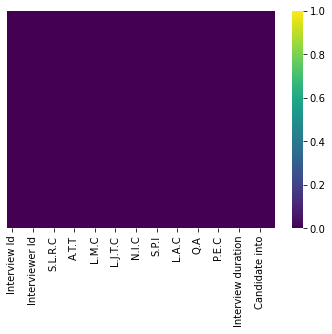

In [21]:
# Checking visually for missing values
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")

In [22]:
# Checking for missing values
for i in df.columns:
    print(i,'=',df[i].isnull().sum(),df[i].dtype)

Interview Id = 0 float64
Candidate Id = 0 float64
Interviewer Id = 0 int64
Profile = 0 object
S.L.R.C = 0 float64
S.L.R.I = 1 float64
A.T.T = 0 int64
L.M.I = 0 int64
L.M.C = 0 int64
S.R = 0 int64
L.J.T.C = 1 float64
L.J.T.I = 0 int64
N.I.C = 0 int64
N.I.I = 0 int64
S.P.I = 2 float64
S.P.C = 0 int64
L.A.C = 0 int64
L.A.I = 1 float64
Q.A = 1 float64
P.E.I = 3 object
P.E.C = 5 object
COMPLIANCE Ratio = 1 float64
Interview duration = 0 int64
Interviewer Intro = 3 object
Candidate into = 0 object
Opp to ask = 1 object


### Missing values are present in the Dataframe

In [23]:
# Treating Missing Values:
for i in df.columns:
    if df[i].dtype in ["int64","float64"]:
        df[i].fillna(df[i].median(),inplace=True)
    else:
        df[i].fillna(df[i].mode()[0],inplace=True)

In [24]:
# Rechecking for missing values
for i in df.columns:
    print(i,'=',df[i].isnull().sum(),df[i].dtype)

Interview Id = 0 float64
Candidate Id = 0 float64
Interviewer Id = 0 int64
Profile = 0 object
S.L.R.C = 0 float64
S.L.R.I = 0 float64
A.T.T = 0 int64
L.M.I = 0 int64
L.M.C = 0 int64
S.R = 0 int64
L.J.T.C = 0 float64
L.J.T.I = 0 int64
N.I.C = 0 int64
N.I.I = 0 int64
S.P.I = 0 float64
S.P.C = 0 int64
L.A.C = 0 int64
L.A.I = 0 float64
Q.A = 0 float64
P.E.I = 0 object
P.E.C = 0 object
COMPLIANCE Ratio = 0 float64
Interview duration = 0 int64
Interviewer Intro = 0 object
Candidate into = 0 object
Opp to ask = 0 object


### Missing values are treated accordingly

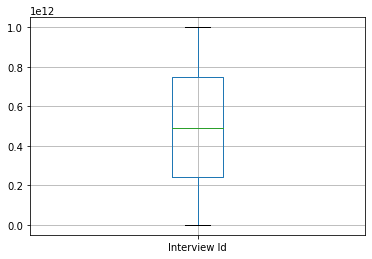

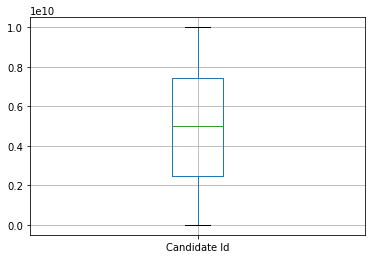

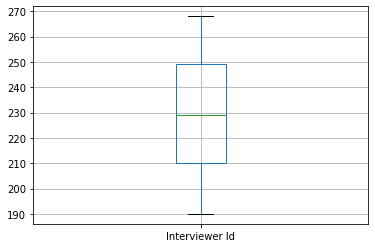

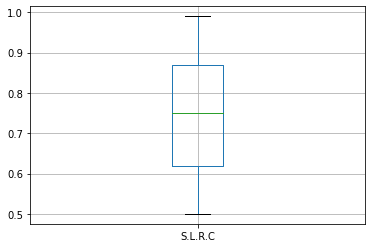

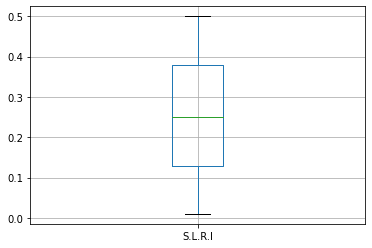

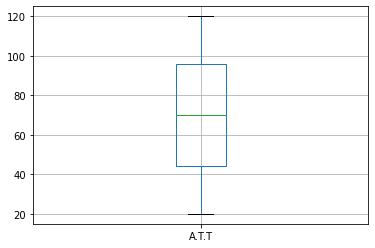

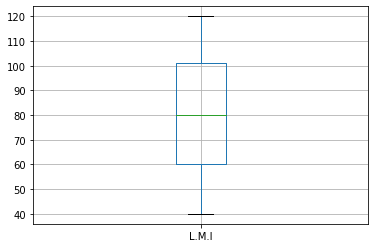

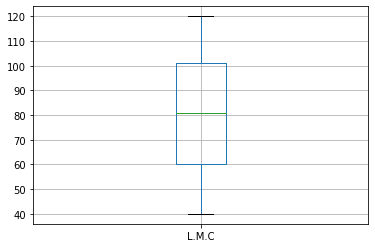

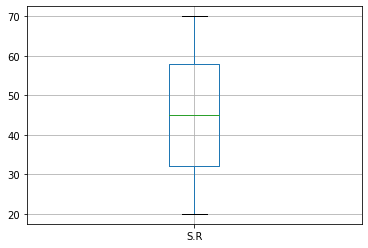

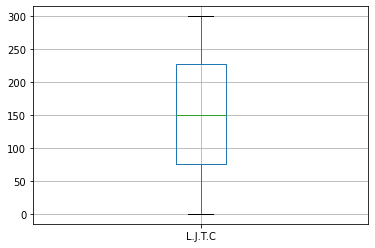

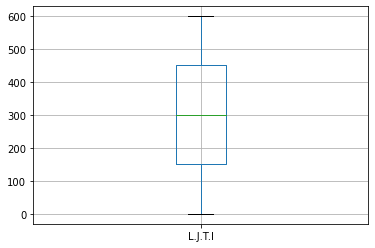

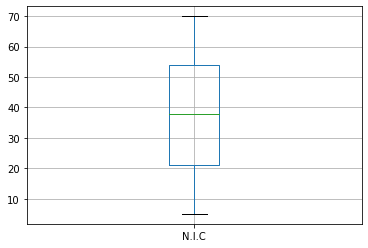

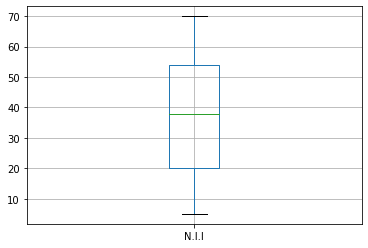

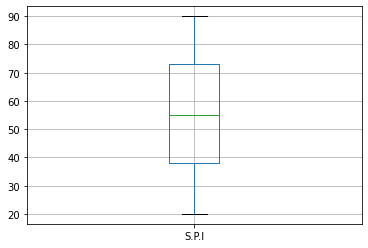

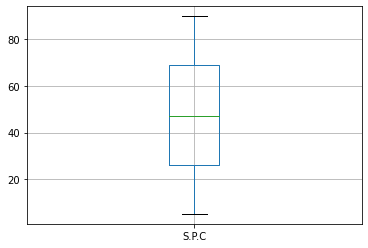

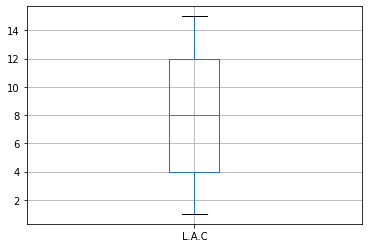

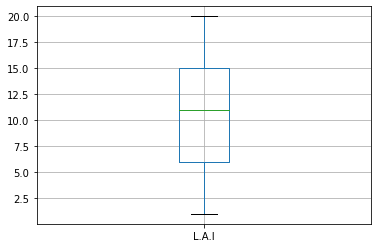

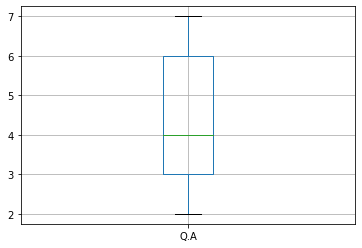

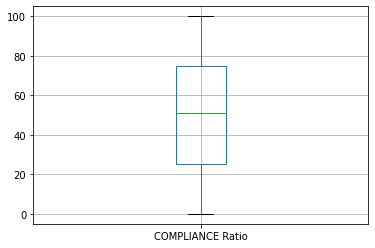

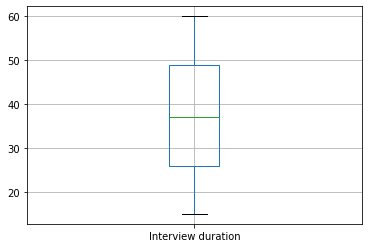

In [25]:
# Checking for Outliers via visualization:
for col in df.columns:
    if df[col].dtype in ["int64","float64"]:
        plt.figure()
        df.boxplot([col])
        plt.show()

### No Outliers Present

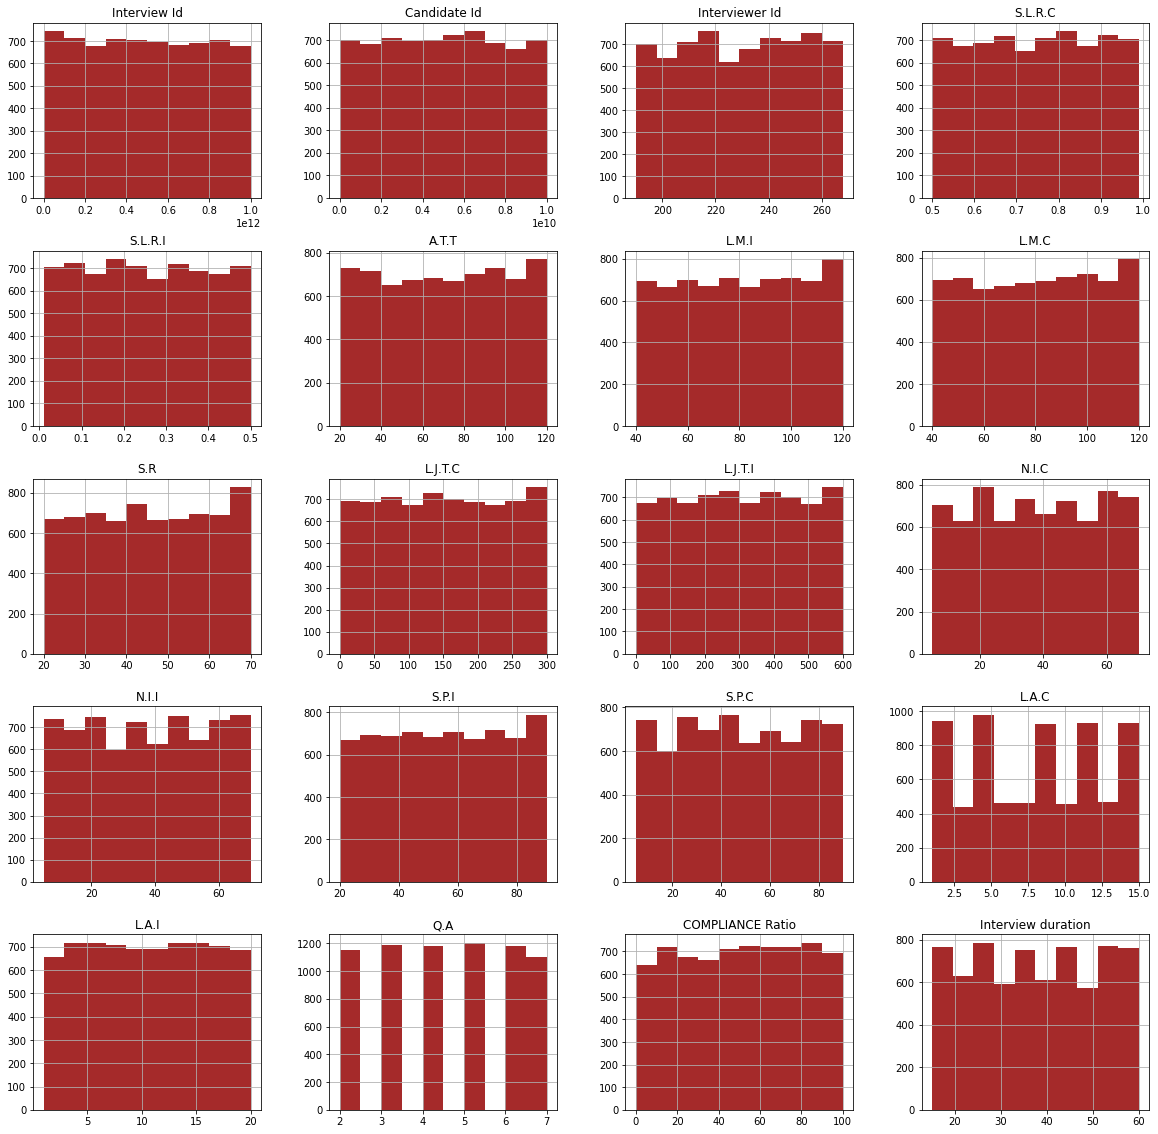

In [26]:
# Visualization of features to check the spread of data:
fig = df.hist(figsize = (20,20),color="brown")

<AxesSubplot:>

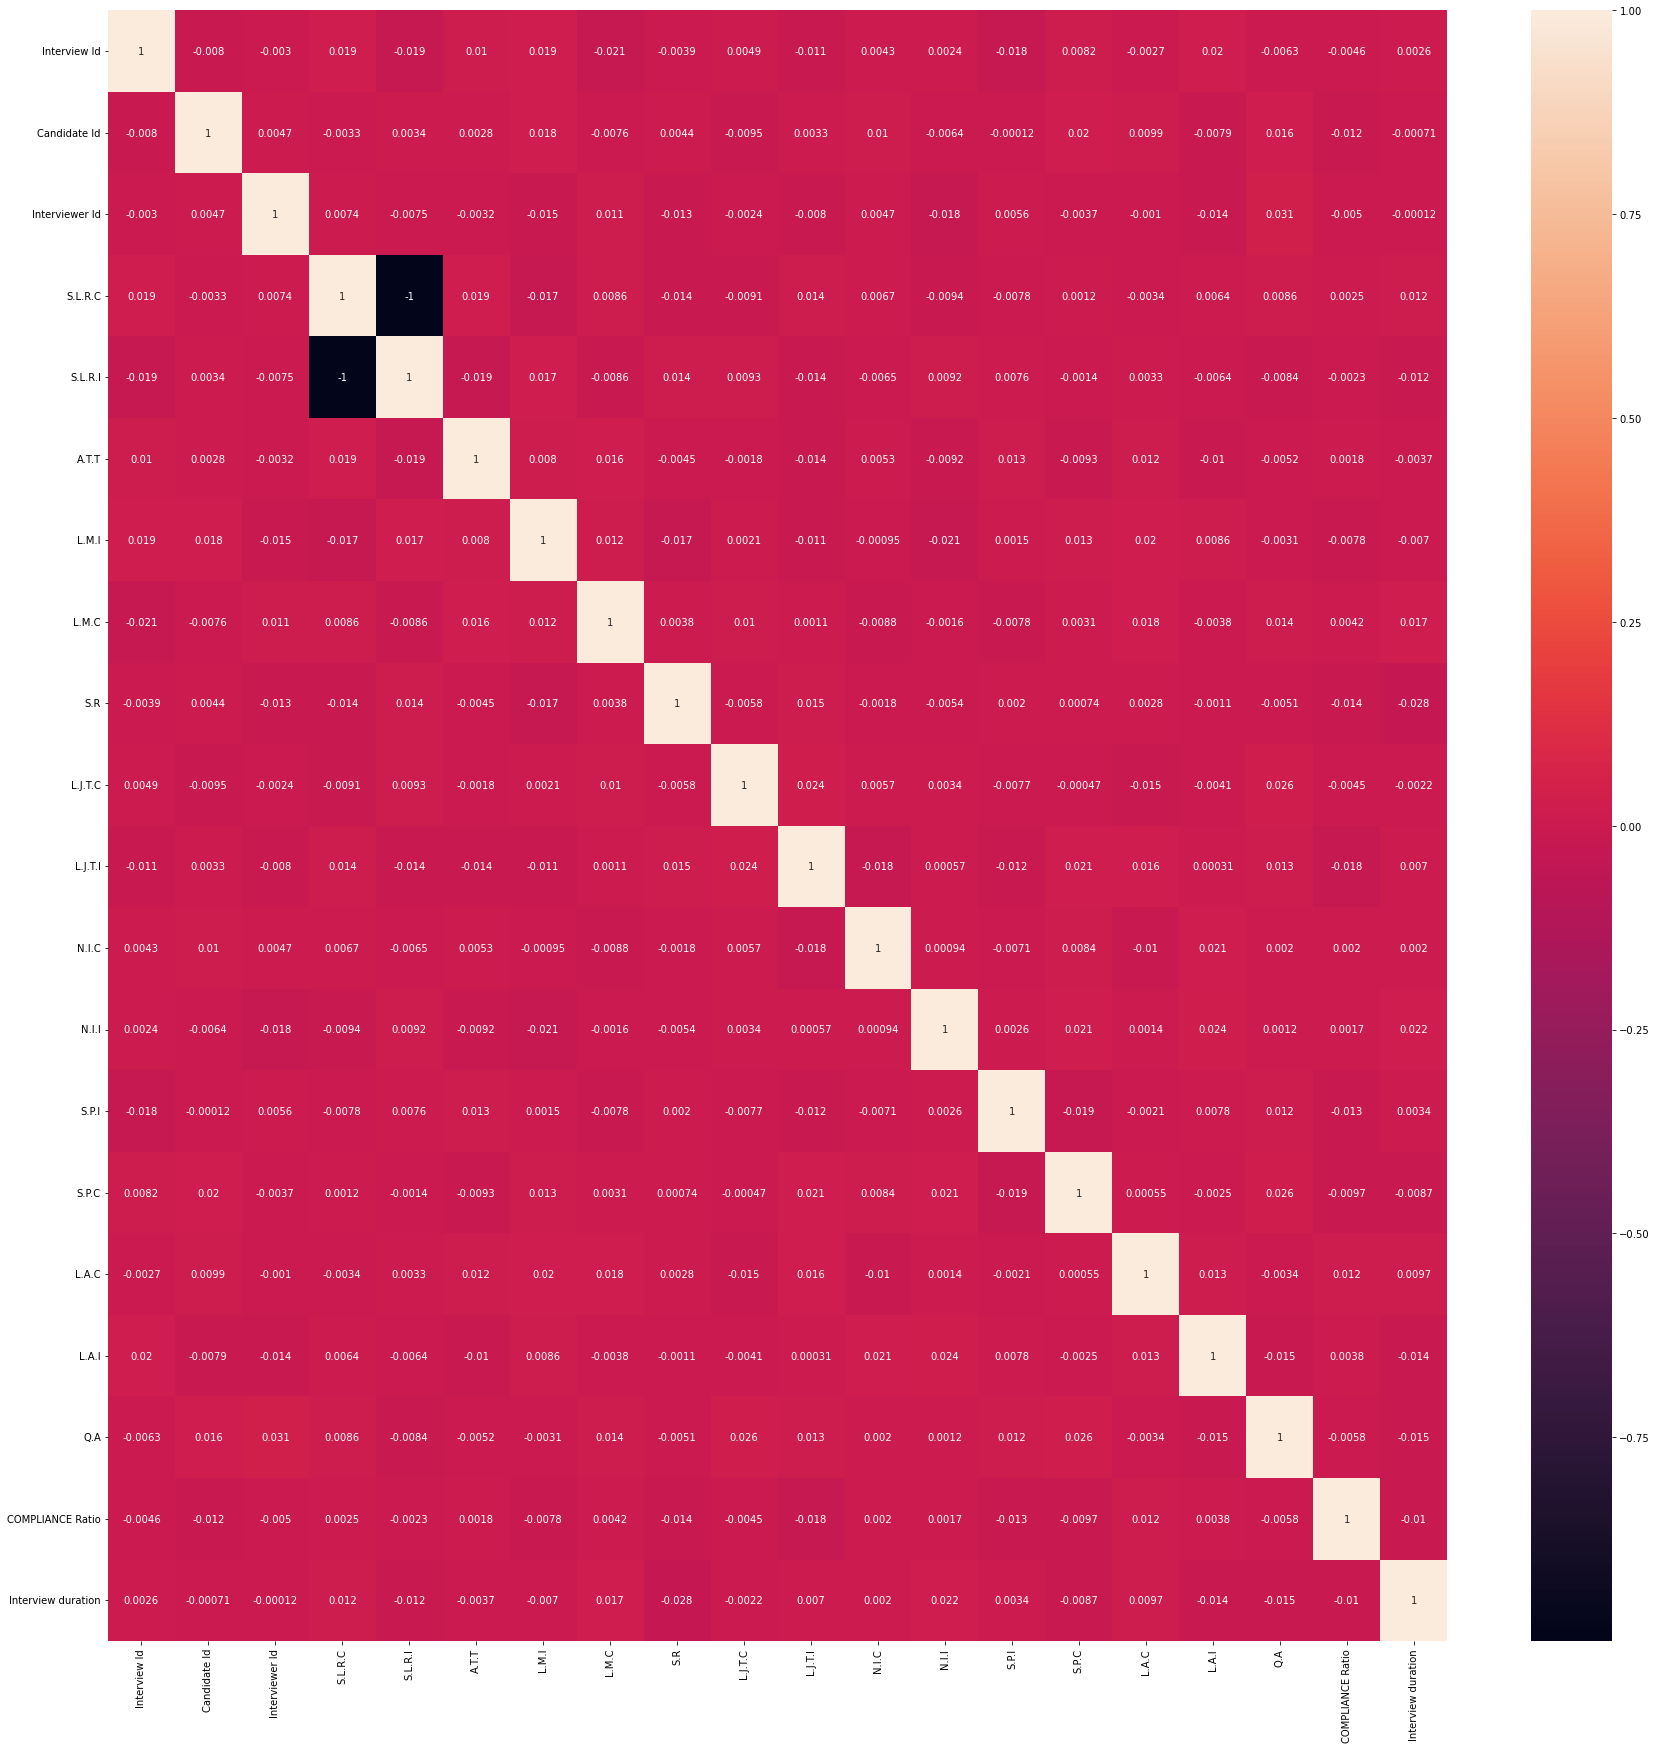

In [27]:
# Visualization of data correlation using heatmap
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True)

### The dataframe has a unique form of correlation.

### Working on catagorical columns

In [28]:
# Shape of the dataset
df.shape

(7000, 26)

In [29]:
# Checking for unique values in catagorical feature/column
for col in df.columns:
    if df[col].dtype=='object':
        print(col,'=',df[col].nunique())

Profile = 10
P.E.I = 3
P.E.C = 3
Interviewer Intro = 2
Candidate into = 2
Opp to ask = 2


In [30]:
# Checking for unique values other interesting columns
# For Interview Id :
I=df["Interview Id"].nunique()
print("Count of Unique Values in Interview Id :",I)
# For Candidate Id :
C=df["Candidate Id"].nunique()
print("Count of Unique Values in Candidate Id :",C)
# For Interviewer Id :
IV=df["Interviewer Id"].nunique()
print("Count of Unique Values in Interviewer Id :",IV)

Count of Unique Values in Interview Id : 7000
Count of Unique Values in Candidate Id : 7000
Count of Unique Values in Interviewer Id : 79


###  Dropping Few Columns since it has more unique values

In [31]:
df.drop(['Interview Id','Candidate Id'], axis=1, inplace=True)

### Since there is catagorical values encoding is needed.
### Since we will be working on two dataset, it's prefered to go with label encoding

In [32]:
# Label Encoding on Catagorical columns:
df_encoded=df.copy()
lben=LabelEncoder()
for col in df_encoded.columns:
    if df_encoded[col].dtype=='object':
        df_encoded[col]=df_encoded[col].astype('category')
        df_encoded[col]=lben.fit_transform(df_encoded[col])
df_encoded.head()
# Encoding done.

,Interviewer Id,Profile,S.L.R.C,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,L.J.T.C,L.J.T.I,...,L.A.C,L.A.I,Q.A,P.E.I,P.E.C,COMPLIANCE Ratio,Interview duration,Interviewer Intro,Candidate into,Opp to ask
0,194,2,0.98,0.02,53,88,93,32,88.0,106,...,13,15.0,6.0,1,1,98.0,37,0,1,1
1,234,9,0.67,0.33,51,53,44,36,93.0,313,...,5,15.0,4.0,1,0,54.0,33,0,0,1
2,267,6,0.81,0.19,60,77,75,54,52.0,67,...,4,7.0,3.0,2,2,31.0,58,0,1,0
3,199,4,0.69,0.31,93,42,103,49,115.0,166,...,10,10.0,7.0,2,0,24.0,35,0,1,0
4,221,7,0.57,0.43,44,44,119,66,190.0,394,...,13,7.0,3.0,0,2,73.0,60,1,1,0


<AxesSubplot:>

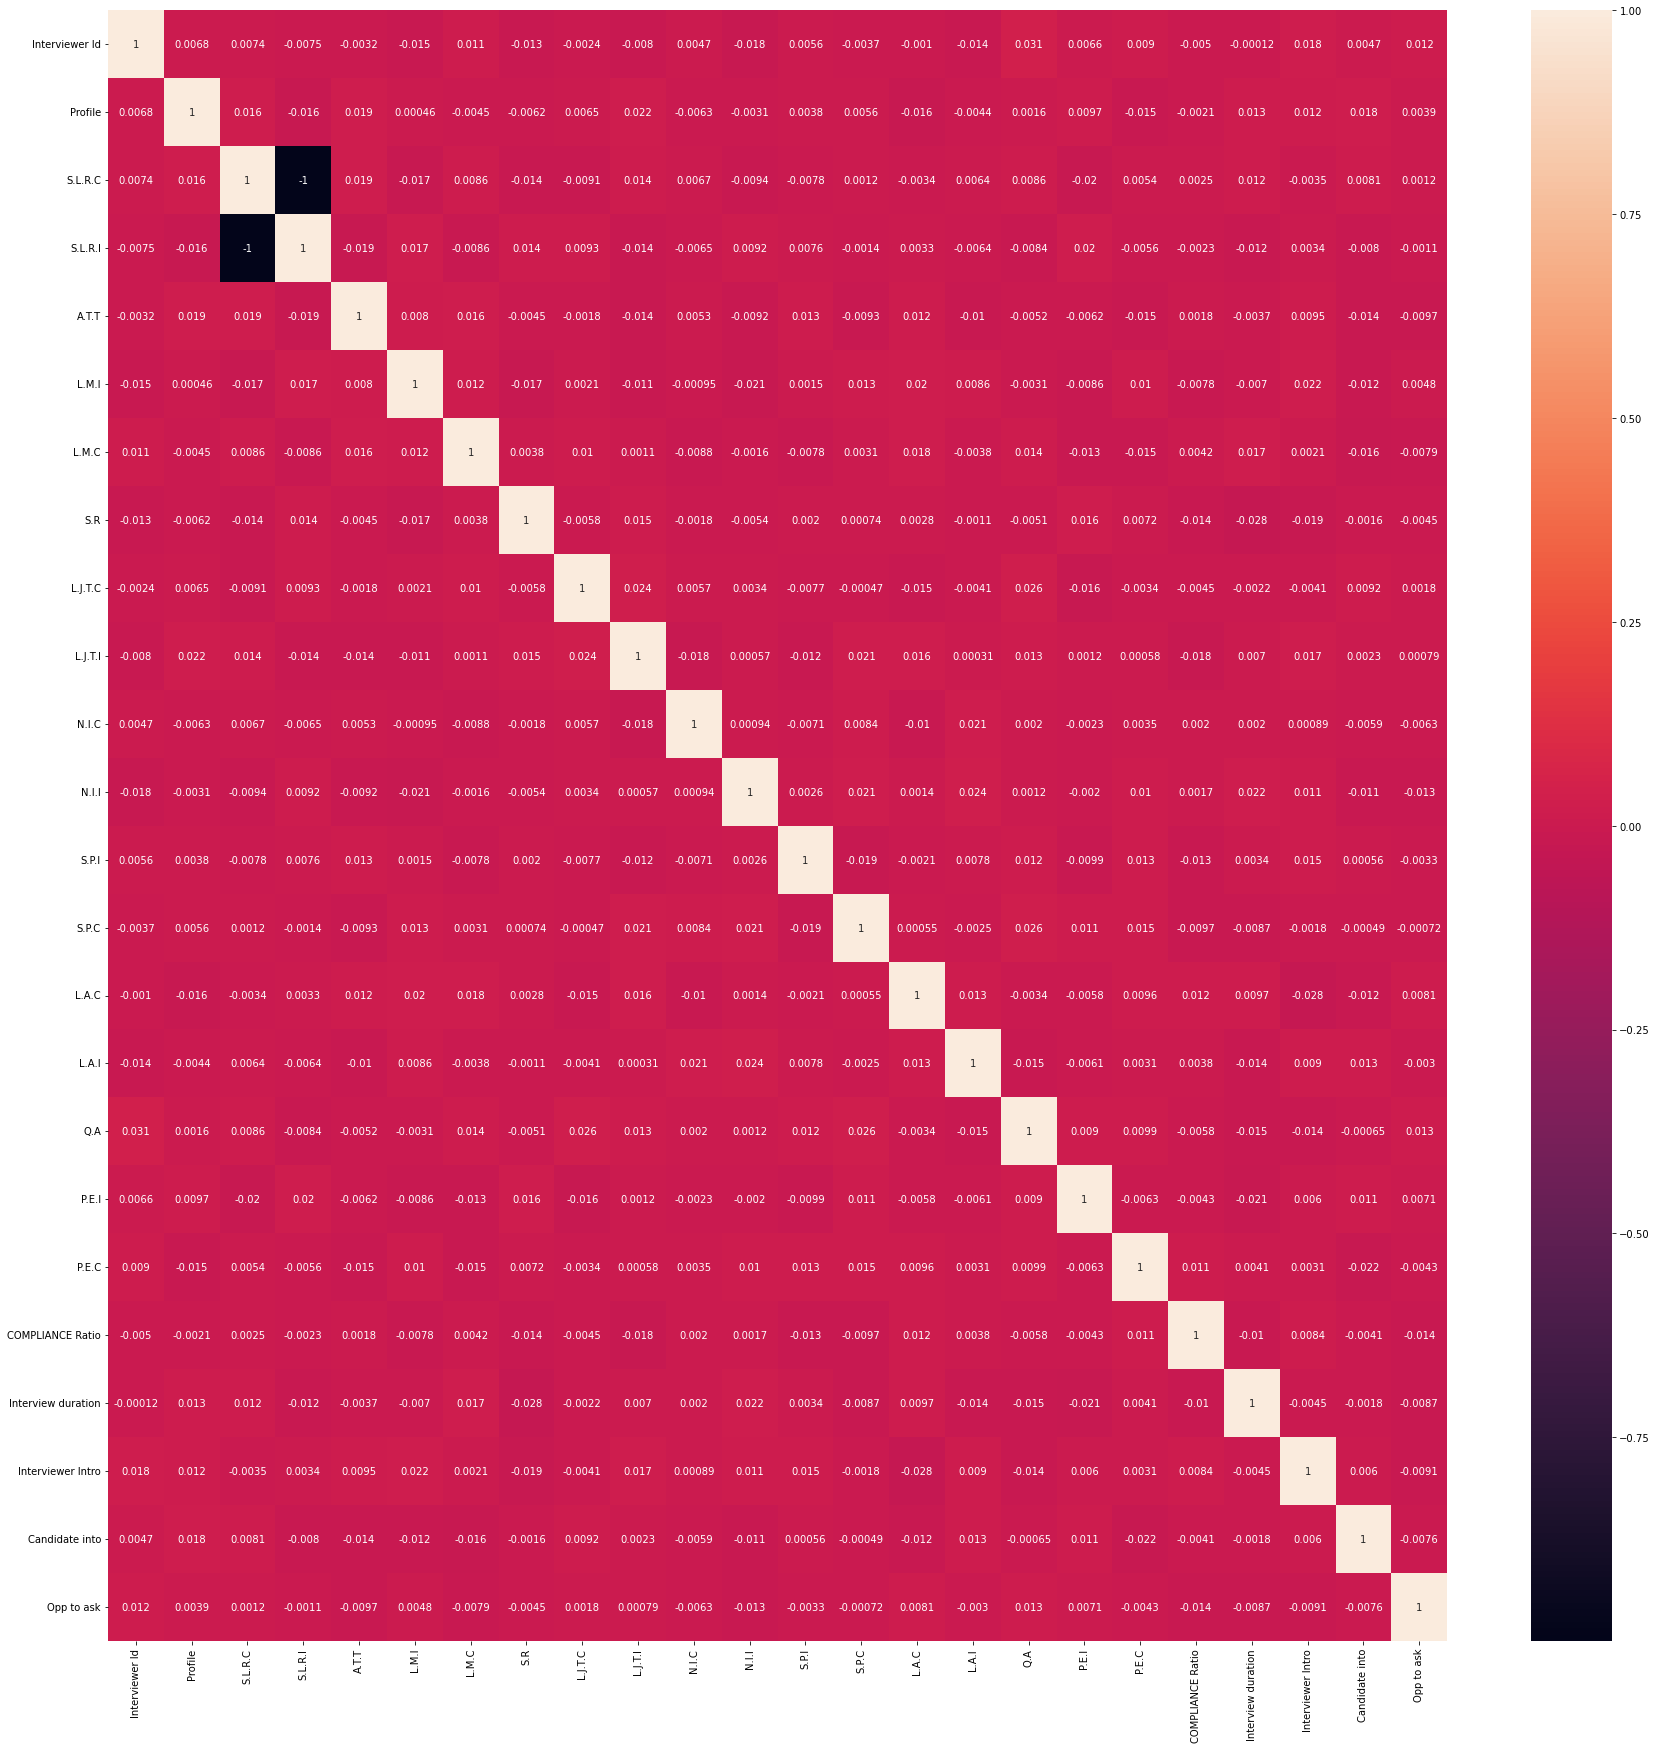

In [33]:
# Visualization of data correlation using heatmap after encoding
plt.figure(figsize=(30,30))
sns.heatmap(df_encoded.corr(),annot=True)

In [34]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 0 to 1199
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Interviewer Id      7000 non-null   int64  
 1   Profile             7000 non-null   int32  
 2   S.L.R.C             7000 non-null   float64
 3   S.L.R.I             7000 non-null   float64
 4   A.T.T               7000 non-null   int64  
 5   L.M.I               7000 non-null   int64  
 6   L.M.C               7000 non-null   int64  
 7   S.R                 7000 non-null   int64  
 8   L.J.T.C             7000 non-null   float64
 9   L.J.T.I             7000 non-null   int64  
 10  N.I.C               7000 non-null   int64  
 11  N.I.I               7000 non-null   int64  
 12  S.P.I               7000 non-null   float64
 13  S.P.C               7000 non-null   int64  
 14  L.A.C               7000 non-null   int64  
 15  L.A.I               7000 non-null   float64
 16  Q.A   

In [35]:
# Checking for Unique Values in the dataset
for col in df_encoded.columns:
    print(col,'=',df_encoded[col].nunique())

Interviewer Id = 79
Profile = 10
S.L.R.C = 50
S.L.R.I = 50
A.T.T = 101
L.M.I = 81
L.M.C = 81
S.R = 51
L.J.T.C = 301
L.J.T.I = 601
N.I.C = 66
N.I.I = 66
S.P.I = 71
S.P.C = 86
L.A.C = 15
L.A.I = 20
Q.A = 6
P.E.I = 3
P.E.C = 3
COMPLIANCE Ratio = 101
Interview duration = 46
Interviewer Intro = 2
Candidate into = 2
Opp to ask = 2


In [36]:
df_encoded.columns

Index(['Interviewer Id', 'Profile', 'S.L.R.C', 'S.L.R.I', 'A.T.T', 'L.M.I',
       'L.M.C', 'S.R', 'L.J.T.C', 'L.J.T.I', 'N.I.C', 'N.I.I', 'S.P.I',
       'S.P.C', 'L.A.C', 'L.A.I', 'Q.A', 'P.E.I', 'P.E.C', 'COMPLIANCE Ratio',
       'Interview duration', 'Interviewer Intro', 'Candidate into',
       'Opp to ask'],
      dtype='object')

In [37]:
# Dropping Status from trdf
df_encoded.drop(['Interviewer Id','S.L.R.I', 'L.M.I', 'S.P.I'],axis=1, inplace=True)

In [38]:
# Seperating Training and testing datasets using indexing
trdf = df_encoded.iloc[:5800]
tedf = df_encoded.iloc[5800:]

In [39]:
trdf

,Profile,S.L.R.C,A.T.T,L.M.C,S.R,L.J.T.C,L.J.T.I,N.I.C,N.I.I,S.P.C,L.A.C,L.A.I,Q.A,P.E.I,P.E.C,COMPLIANCE Ratio,Interview duration,Interviewer Intro,Candidate into,Opp to ask
0,2,0.98,53,93,32,88.0,106,41,66,47,13,15.0,6.0,1,1,98.0,37,0,1,1
1,9,0.67,51,44,36,93.0,313,28,62,52,5,15.0,4.0,1,0,54.0,33,0,0,1
2,6,0.81,60,75,54,52.0,67,26,14,34,4,7.0,3.0,2,2,31.0,58,0,1,0
3,4,0.69,93,103,49,115.0,166,62,55,75,10,10.0,7.0,2,0,24.0,35,0,1,0
4,7,0.57,44,119,66,190.0,394,7,32,74,13,7.0,3.0,0,2,73.0,60,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5795,4,0.58,52,119,42,274.0,100,13,15,6,6,13.0,5.0,0,1,16.0,25,1,1,0
5796,8,0.69,34,115,51,11.0,401,19,5,13,6,3.0,6.0,2,0,23.0,40,1,1,0
5797,5,0.64,58,43,42,143.0,240,59,63,77,3,19.0,3.0,0,1,60.0,18,0,1,0
5798,9,0.94,104,114,68,83.0,518,35,54,45,11,14.0,3.0,1,2,61.0,43,1,1,1


In [40]:
tedf

,Profile,S.L.R.C,A.T.T,L.M.C,S.R,L.J.T.C,L.J.T.I,N.I.C,N.I.I,S.P.C,L.A.C,L.A.I,Q.A,P.E.I,P.E.C,COMPLIANCE Ratio,Interview duration,Interviewer Intro,Candidate into,Opp to ask
0,5,0.52,103,77,30,26.0,287,8,22,88,5,19.0,4.0,2,0,24.0,49,1,1,1
1,5,0.87,54,57,68,179.0,253,62,40,81,1,9.0,7.0,2,1,99.0,24,0,1,1
2,7,0.60,50,93,36,137.0,31,40,52,13,7,15.0,3.0,0,2,16.0,16,1,0,1
3,3,0.52,102,66,31,176.0,242,69,66,10,10,4.0,6.0,0,1,66.0,40,0,0,1
4,3,0.59,96,115,23,218.0,215,69,42,20,10,4.0,6.0,2,2,47.0,38,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,4,0.66,95,79,65,294.0,110,61,29,85,15,20.0,7.0,2,0,86.0,49,1,1,0
1196,1,0.66,42,107,57,54.0,140,35,33,76,8,18.0,2.0,2,0,32.0,32,0,1,0
1197,3,0.73,72,78,55,247.0,158,30,39,6,1,18.0,3.0,0,0,34.0,19,1,1,0
1198,2,0.95,42,68,60,97.0,327,65,42,63,1,9.0,7.0,2,0,78.0,23,0,0,0


In [41]:
# Adding Global_sales column back to the dataframe
trdf['Status'] = df_tar['Status']

C:\Users\roshs\AppData\Local\Temp/ipykernel_15540/1898247183.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trdf['Status'] = df_tar['Status']


In [42]:
# Handling Status Column Training Dataset
trdf['Status'].fillna(trdf['Status'].mode()[0],inplace=True)

C:\Users\roshs\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [43]:
trdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5800 entries, 0 to 5799
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Profile             5800 non-null   int32  
 1   S.L.R.C             5800 non-null   float64
 2   A.T.T               5800 non-null   int64  
 3   L.M.C               5800 non-null   int64  
 4   S.R                 5800 non-null   int64  
 5   L.J.T.C             5800 non-null   float64
 6   L.J.T.I             5800 non-null   int64  
 7   N.I.C               5800 non-null   int64  
 8   N.I.I               5800 non-null   int64  
 9   S.P.C               5800 non-null   int64  
 10  L.A.C               5800 non-null   int64  
 11  L.A.I               5800 non-null   float64
 12  Q.A                 5800 non-null   float64
 13  P.E.I               5800 non-null   int32  
 14  P.E.C               5800 non-null   int32  
 15  COMPLIANCE Ratio    5800 non-null   float64
 16  Interv

In [44]:
trdf['Status'].unique()

array(['Consider', 'May Consider', 'Not Consider'], dtype=object)

### 4. Data Spliting:

In [45]:
# Seperating Independent and Dependent Variables
x=trdf.drop(labels=['Status'],axis=1)
y=trdf[['Status']]

In [46]:
# Seperating Training and Testing Data for Model Building
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.3)

### 5.a. Decision Tree Regressor Models and Pruning:

In [47]:
# Decision Tree model build 
dTreep=DecisionTreeClassifier(max_depth=5)
# Model Fitting
dTreep.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [48]:
# Accuracy Testing
dtptr=dTreep.score(x_train,y_train)
print('Train Score:',dtptr)
dtpte=dTreep.score(x_test,y_test)
print('Test Score: ',dtpte)

Train Score: 0.8618226600985222
Test Score:  0.8206896551724138


### This model seems to be an less overfitting one, we can try with other models.

### 5.b. Ramdom Forest Regressor Model:

In [49]:
# Random Forest Model Build
rf = RandomForestClassifier(n_estimators = 500)
# Model Fitting
rf.fit(x_train, y_train)

C:\Users\roshs\AppData\Local\Temp/ipykernel_15540/1798719462.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


RandomForestClassifier(n_estimators=500)

In [50]:
# Accuracy Testing
rftr=rf.score(x_train,y_train)
print('Train Score:',rftr)
rfte=rf.score(x_test,y_test)
print('Test Score: ',rfte)

Train Score: 1.0
Test Score:  0.9051724137931034


### This model seems to be an overfitting one, we can try with other models.

### 5.c. Logistic Regressor Model:

In [51]:
# Random Forest Model Build
lr = LogisticRegression()
# Model Fitting
lr.fit(x_train, y_train)

C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\roshs\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [52]:
# Accuracy Testing
lrtr=lr.score(x_train,y_train)
print('Train Score:',lrtr)
lrte=lr.score(x_test,y_test)
print('Test Score: ',lrte)

Train Score: 0.962807881773399
Test Score:  0.9626436781609196


### This model seems to be a Decent one with close to perfect value, we can try with other models.

### 5.d. XGBoost Classifier Model:

In [53]:
# XGBoost Classifier Model Build
xgb = XGBClassifier()
# Model Fitting
xgb.fit(x_train, y_train)

C:\Users\roshs\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[19:49:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [54]:
# Accuracy Testing
xgbtr=xgb.score(x_train,y_train)
print('Train Score:',xgbtr)
xgbte=xgb.score(x_test,y_test)
print('Test Score: ',xgbte)

Train Score: 1.0
Test Score:  0.9402298850574713


### This model seems to be a less overfitting one, we can try with other models.

### 5.e. Gaussian Naive Bayes Model:

In [55]:
# Gaussian Naive Bayes Model
gnb = GaussianNB()
# Model Fitting
gnb.fit(x_train, y_train)

C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB()

In [56]:
# Accuracy Testing
gnbtr=gnb.score(x_train,y_train)
print('Train Score:',gnbtr)
gnbte=gnb.score(x_test,y_test)
print('Test Score: ',gnbte)

Train Score: 0.8401477832512315
Test Score:  0.8206896551724138


### This model seems to be a less overfitting one, we can try with other models.

### 5.f. Support Vector Classifier Model:

In [57]:
# Support Vector Classifier Model
svc = SVC(kernel ='linear', C = 2)
# Model Fitting
svc.fit(x_train, y_train)

C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(C=2, kernel='linear')

In [58]:
# Accuracy Testing
svctr=svc.score(x_train,y_train)
print('Train Score:',svctr)
svcte=svc.score(x_test,y_test)
print('Test Score: ',svcte)

Train Score: 0.9982758620689656
Test Score:  0.9942528735632183


### This model seems to be a Decent one, we can proceed to Conclusion segment.

### 6. Conclusion:

In [59]:
print('Decision Tree Model:')
print('Train Score:',dtptr)
print('Test Score: ',dtpte)
print('Random Forest Model:')
print('Train Score:',rftr)
print('Test Score: ',rfte)
print('Logistic Regressor Model:')
print('Train Score:',lrtr)
print('Test Score: ',lrte)
print('XGBoost Classifier Model:')
print('Train Score:',xgbtr)
print('Test Score: ',xgbte)
print('Gaussian Naive Bayes Model:')
print('Train Score:',gnbtr)
print('Test Score: ',gnbte)
print('Support Vector Classifier Model:')
print('Train Score:',svctr)
print('Test Score: ',svcte)

Decision Tree Model:
Train Score: 0.8618226600985222
Test Score:  0.8206896551724138
Random Forest Model:
Train Score: 1.0
Test Score:  0.9051724137931034
Logistic Regressor Model:
Train Score: 0.962807881773399
Test Score:  0.9626436781609196
XGBoost Classifier Model:
Train Score: 1.0
Test Score:  0.9402298850574713
Gaussian Naive Bayes Model:
Train Score: 0.8401477832512315
Test Score:  0.8206896551724138
Support Vector Classifier Model:
Train Score: 0.9982758620689656
Test Score:  0.9942528735632183


# Conclusion:
## All the models seems to have some imperfections; lets go with Support Vector Classifier Model one.

### Predicting the values of testing dataset using Random Forest Model

In [60]:
pred=svc.predict(tedf)

In [61]:
pred[:10]

array(['Consider', 'May Consider', 'May Consider', 'Not Consider',
       'Not Consider', 'Not Consider', 'Not Consider', 'May Consider',
       'Not Consider', 'May Consider'], dtype=object)

In [62]:
pred.shape

(1200,)

In [63]:
# Creating a new dataset of final predictions
# Importing testing data
tedf=pd.read_csv('test_IA_-_test.csv')
df_final = pd.DataFrame()
df_final['Interview Id'] = tedf['Interview Id']
df_final.sample()

,Interview Id
888,288285314717


In [64]:
# Checking shape for correction
df_final.shape

(1200, 1)

In [65]:
df_final['Status']=pred

In [66]:
# Printing Final prediction dataset
df_final

,Interview Id,Status
0,702127796635,Consider
1,613490569071,May Consider
2,759998772623,May Consider
3,391760082113,Not Consider
4,941599210196,Not Consider
...,...,...
1195,256033687434,Not Consider
1196,627337316047,Consider
1197,75547031851,Not Consider
1198,173914777164,May Consider


In [67]:
# Creating and storing the final dataset as a csv file
df_final.to_csv('Final_csv.csv',index=0)

In [68]:
# Checking the csv file for confirmation
cdf=pd.read_csv('Final_csv.csv')
cdf

,Interview Id,Status
0,702127796635,Consider
1,613490569071,May Consider
2,759998772623,May Consider
3,391760082113,Not Consider
4,941599210196,Not Consider
...,...,...
1195,256033687434,Not Consider
1196,627337316047,Consider
1197,75547031851,Not Consider
1198,173914777164,May Consider


# Project Completed with close to perfect score and clean final csv file